In [1]:
# (a) Import required libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# (b) Upload / access the dataset
data = pd.read_csv("creditcard.csv")

# Separate features and labels
X = data.drop("Class", axis=1).values
y = data["Class"].values

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [3]:
# (c) Encoder – converts input into latent representation
input_dim = X.shape[1]
input_layer = keras.layers.Input(shape=(input_dim,))
encoded = keras.layers.Dense(32, activation='relu')(input_layer)
encoded = keras.layers.Dense(16, activation='relu')(encoded)
encoded = keras.layers.Dense(8, activation='relu')(encoded)
encoded = keras.layers.Dense(4, activation='relu')(encoded)  

In [4]:
# (d) Decoder – reconstructs input from latent representation
decoded = keras.layers.Dense(8, activation='relu')(encoded)
decoded = keras.layers.Dense(input_dim, activation='sigmoid')(decoded)

# Define Autoencoder
autoencoder = keras.models.Model(inputs=input_layer, outputs=decoded)

In [5]:
# (e) Compile model with optimizer, loss, and metrics
autoencoder.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train only on normal transactions
X_train = X[y == 0]
history = autoencoder.fit(X_train, X_train, epochs=10, batch_size=32, shuffle=True, verbose=1)

Epoch 1/10
8885/8885 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 0.8902 - mae: 0.6235
Epoch 2/10
8885/8885 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.8607 - mae: 0.6086
Epoch 3/10
8885/8885 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.8536 - mae: 0.6049
Epoch 4/10
8885/8885 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.8487 - mae: 0.6035
Epoch 5/10
8885/8885 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.8447 - mae: 0.6021
Epoch 6/10
8885/8885 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - loss: 0.8415 - mae: 0.6009
Epoch 7/10
8885/8885 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.8389 - mae: 0.5995
Epoch 8/10
8885/8885 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.8357 - mae: 0.5977
Epoch 9/10
8885/8885 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - loss: 0.8322 - mae: 0.5955
Epoch 10/10
8885/8885 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - loss: 0.8302 - mae: 0.5939


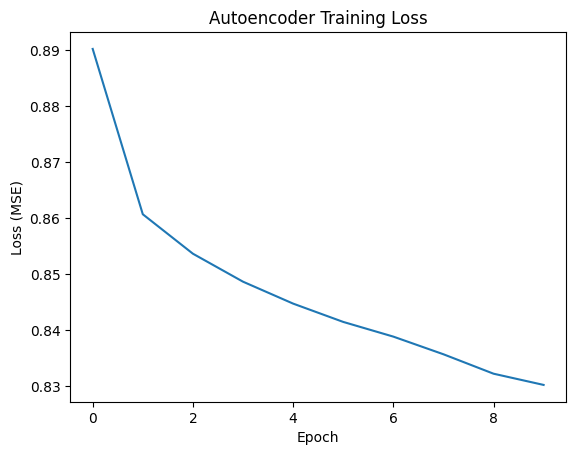

In [8]:
# Visualization – training loss over epochs
plt.plot(history.history['loss'])
plt.title('Autoencoder Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.show()

8901/8901 ━━━━━━━━━━━━━━━━━━━━ 8s 854us/step


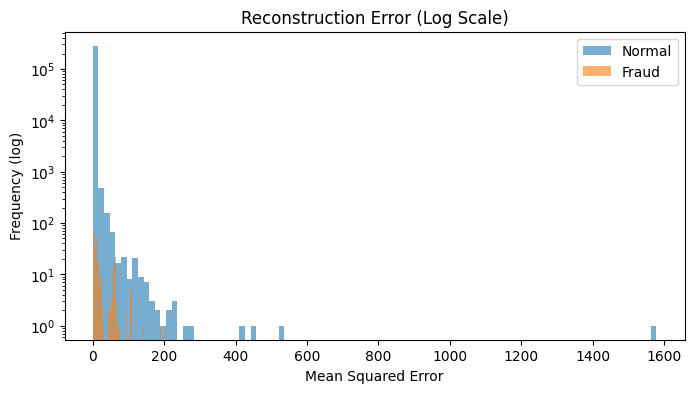

In [11]:
# Visualization – compare reconstruction error between Normal and Fraud
reconstructed = autoencoder.predict(X)
mse = np.mean(np.power(X - reconstructed, 2), axis=1)

plt.figure(figsize=(8,4))
plt.hist(mse[y == 0], bins=100, alpha=0.6, label='Normal')
plt.hist(mse[y == 1], bins=100, alpha=0.6, label='Fraud')
plt.yscale('log')
plt.title('Reconstruction Error (Log Scale)')
plt.xlabel('Mean Squared Error')
plt.ylabel('Frequency (log)')
plt.legend()
plt.show()